In [2]:
#Import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
#Read in the pandas datafile
df=pd.read_csv("budget_data.csv")
df.info()
df.head()
df.tail()
df1=df.copy()
df1["Month"]=df1["Date"].str.split("-",expand=True)[0]
df1["Month"]
df1["Year"]=df1["Date"].str.split("-",expand=True)[1]
df1["Year"]
df1.head(10)
df1.groupby("Month")["Profit/Losses"].mean().sort_values()
df1.groupby("Year")["Profit/Losses"].sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           86 non-null     object
 1   Profit/Losses  86 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


Year
10     593907
16     912802
17     989747
11    2211472
12    3683506
14    4065704
15    4630960
13    5476100
Name: Profit/Losses, dtype: int64

,Date,Profit/Losses
0,Jan-10,1088983
1,Feb-10,-354534
2,Mar-10,276622
3,Apr-10,-728133
4,May-10,852993


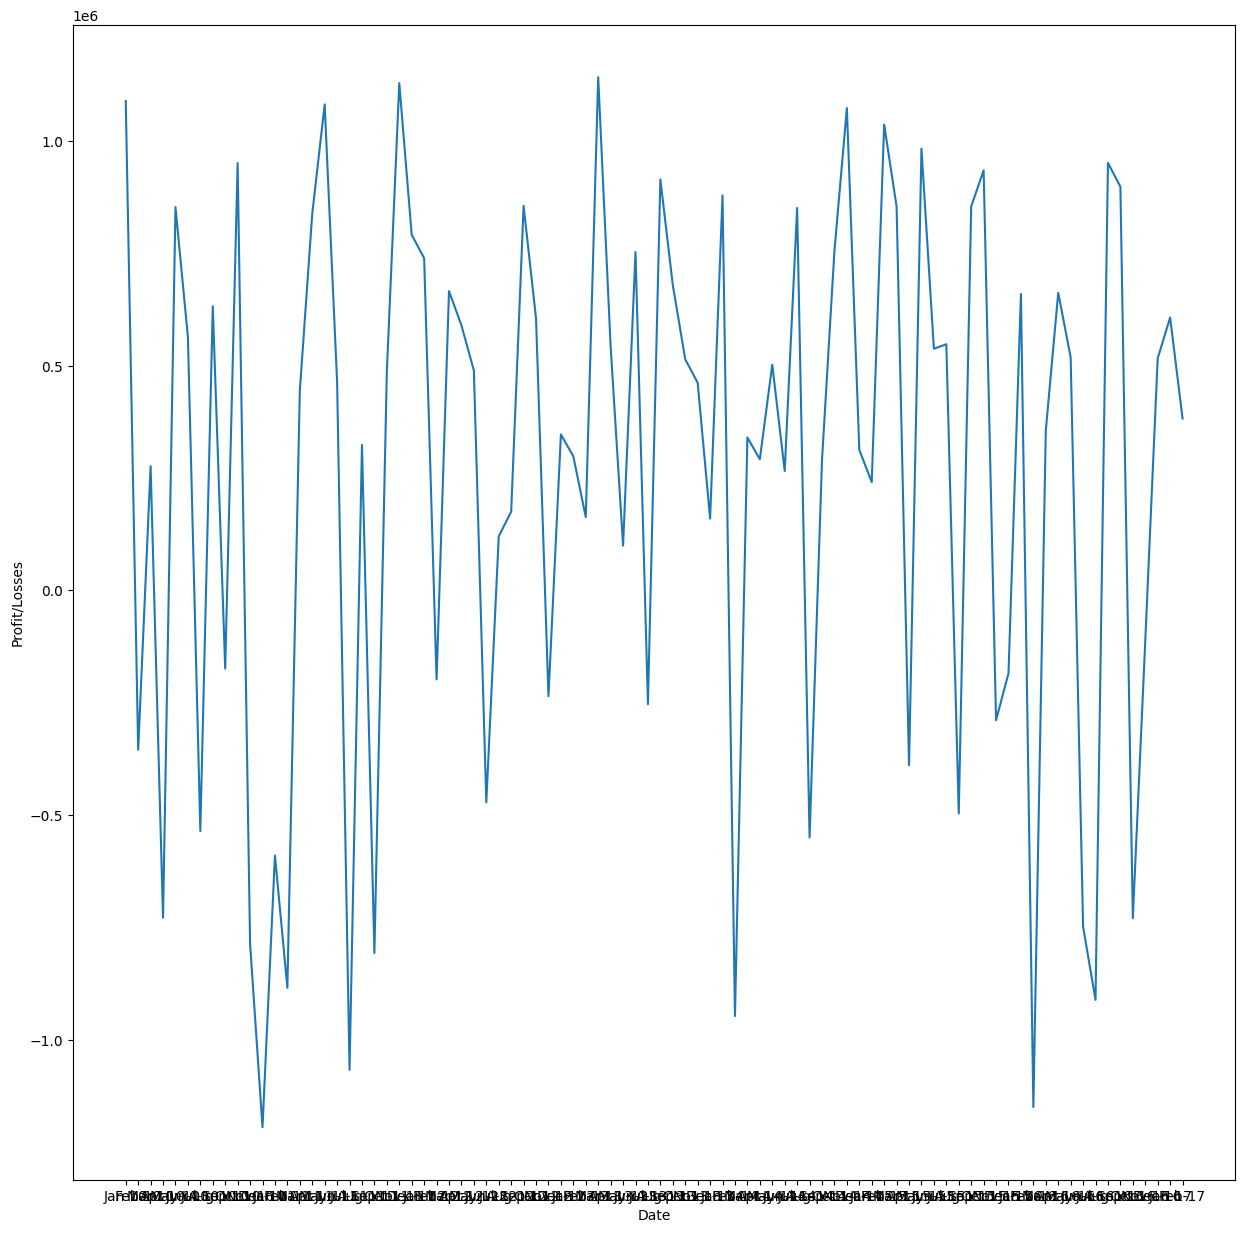

In [7]:
#Examine the top 5 rows of the dataset
df.head()
plt.figure(figsize=(15,15))
sns.lineplot(x="Date",y="Profit/Losses",data=df)
df.head()

In [ ]:
#It is evident from the .value_counts() method that there are 86 unique months in the Month-Year notation
uniquemonths=len(df["Date"].value_counts())
uniquemonths

86

In [ ]:
#The Net Amount of Profit/Losses over the entire period of 86 Months:
totalprofitloss=df["Profit/Losses"].sum()
totalprofitloss

22564198

In [ ]:
df.tail()

,Date,Profit/Losses
81,Oct,-729004
82,Nov,-112209
83,Dec,516313
84,Jan,607208
85,Feb,382539


In [ ]:
df.head()
for i in df["Profit/Losses"]:


,Date,Profit/Losses
0,Jan,1088983
1,Feb,-354534
2,Mar,276622
3,Apr,-728133
4,May,852993


In [ ]:
#The difference in profit from the Latest Period to the Earliest Period clearly indicates a substantial
#Loss in the Amount of USD 706,444:
df["Date"].to_list()
differenceinprofitpd1topd86=df["Profit/Losses"][85]-df["Profit/Losses"][0]
differenceinprofitpd1topd86

-706444

In [ ]:
df["Amount of Change"]=df["Profit/Losses"].diff()
df["Amount of Change"]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
averagechange=df["Amount of Change"].mean()
averagechange

-8311.105882352942

In [ ]:
#Highest Percentage Increase in Profits
incrinprofits=df[df["Amount of Change"]==df["Amount of Change"].max()]
incrinprofits1=print(str(incrinprofits["Date"])+""+str(incrinprofits["Amount of Change"]))
#Highest Percentage Increase in Profits
decrinprofits=df[df["Amount of Change"]==df["Amount of Change"].min()]
decrinprofits1=print(str(decrinprofits["Date"])+""+str(decrinprofits["Amount of Change"]))
incrinprofits2="Row 79 Aug-16 1862002.000"
decrinprofits2="Row 49 Feb-14 -1825558.000"

79    Aug-16
Name: Date, dtype: object79   1862002.000
Name: Amount of Change, dtype: float64
49    Feb-14
Name: Date, dtype: object49   -1825558.000
Name: Amount of Change, dtype: float64


In [ ]:
#Highest Loss in Profits
decrinprofits=df[df["Amount of Change"]==df["Amount of Change"].min()]
decrinprofits
finaldf=pd.DataFrame({"Total_Months":uniquemonths, "Total":totalprofitloss, "Average Change": averagechange,"incrprofit": incrinprofits2,"decrinprofit":decrinprofits2},index=[0])
finaldf.to_csv("Table_Stocks.csv")
finaldf

,Total_Months,Total,Average Change,incrprofit,decrinprofit
0,86,22564198,-8311.106,Row 79 Aug-16 1862002.000,Row 49 Feb-14 -1825558.000


In [26]:
#Read in the second file
df2=pd.read_csv("election_data.csv")

In [29]:
#Heading for the second file
df2.head()
df2.groupby("County")['Candidate'].value_counts()

County     Candidate              
Arapahoe   Diana DeGette               15647
           Charles Casper Stockham      8302
           Raymon Anthony Doane          852
Denver     Diana DeGette              239282
           Charles Casper Stockham     57188
           Raymon Anthony Doane         9585
Jefferson  Charles Casper Stockham     19723
           Diana DeGette               17963
           Raymon Anthony Doane         1169
Name: Candidate, dtype: int64

In [ ]:
#Identify the columns in the dataset:
df2.columns

Index(['Ballot ID', 'County', 'Candidate'], dtype='object')

In [ ]:
#Total Number of Votes Cast:
totalnumberofvotes=len(df2['Ballot ID'].unique())
totalnumberofvotes

369711

In [ ]:
#List of Candidates:
listofcandidates=(df2["Candidate"].unique())
listofcandidates

array(['Charles Casper Stockham', 'Diana DeGette', 'Raymon Anthony Doane'],
      dtype=object)

In [ ]:
#Percentages of Votes Won:
percentagesofvoteswon=df2.groupby("Candidate")["Ballot ID"].count()/len(df2)
percentagesofvoteswon

Candidate
Charles Casper Stockham   0.230
Diana DeGette             0.738
Raymon Anthony Doane      0.031
Name: Ballot ID, dtype: float64

In [ ]:
totalnumberofvoteswon=df2.groupby("Candidate")["Ballot ID"].count()
totalnumberofvoteswon

Candidate
Charles Casper Stockham     85213
Diana DeGette              272892
Raymon Anthony Doane        11606
Name: Ballot ID, dtype: int64

In [ ]:
#Diana DeGette wins the election:
totalwon=totalnumberofvoteswon.sort_values(ascending=False)[0]
totalnumberofvoteswoncandidates=str("Diana DeGette")

In [ ]:
electionresults=pd.DataFrame({"Total Votes":totalnumberofvotes, "Pct Won": percentagesofvoteswon, "Total Number of Votes Won": totalnumberofvoteswon, "totalnumberofvoteswoncandidate":totalnumberofvoteswoncandidates})

In [ ]:
electionresults.to_csv("ElectionResults.csv")